In [1]:
from pyforest import *
lazy_imports()

['from sklearn.linear_model import Lasso',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import pydot',
 'import keras',
 'import awswrangler as wr',
 'from dask import dataframe as dd',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import nltk',
 'from sklearn.linear_model import LogisticRegression',
 'import datetime as dt',
 'from sklearn.manifold import TSNE',
 'import dash',
 'from sklearn.linear_model import Ridge',
 'from pyspark import SparkContext',
 'import sklearn',
 'from sklearn.model_selection import KFold',
 'from scipy import stats',
 'from sklearn.model_selection import StratifiedKFold',
 'import tqdm',
 'from sklearn.impute import SimpleImputer',
 'import fbprophet',
 'from sklearn.decomposition import PCA',
 'from sklearn.cluster import KMeans',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.linear_model import ElasticNetCV',
 'import gensim',
 'from statsmod

In [2]:
df=pd.read_csv('BankNote_Authentication.csv')
df.head()

<IPython.core.display.Javascript object>

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [3]:
df.shape

(1372, 5)

In [4]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [5]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

**Visualization**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\sanje\AppData\Local\Temp\ipykernel_15008\1415702655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'],color='red')


<AxesSubplot: title={'center': 'Disrtibution of Class'}, xlabel='class', ylabel='Density'>

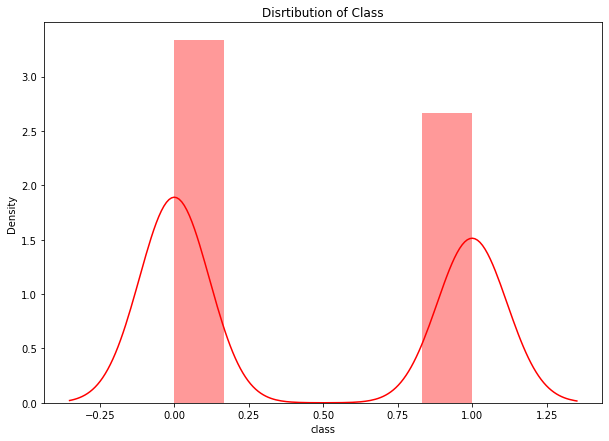

In [7]:
plt.figure(figsize=(10,7))
plt.title('Disrtibution of Class')
sns.distplot(df['class'],color='red')


array([[<AxesSubplot: title={'center': 'variance'}>,
        <AxesSubplot: title={'center': 'skewness'}>,
        <AxesSubplot: title={'center': 'curtosis'}>],
       [<AxesSubplot: title={'center': 'entropy'}>,
        <AxesSubplot: title={'center': 'class'}>, <AxesSubplot: >]],
      dtype=object)

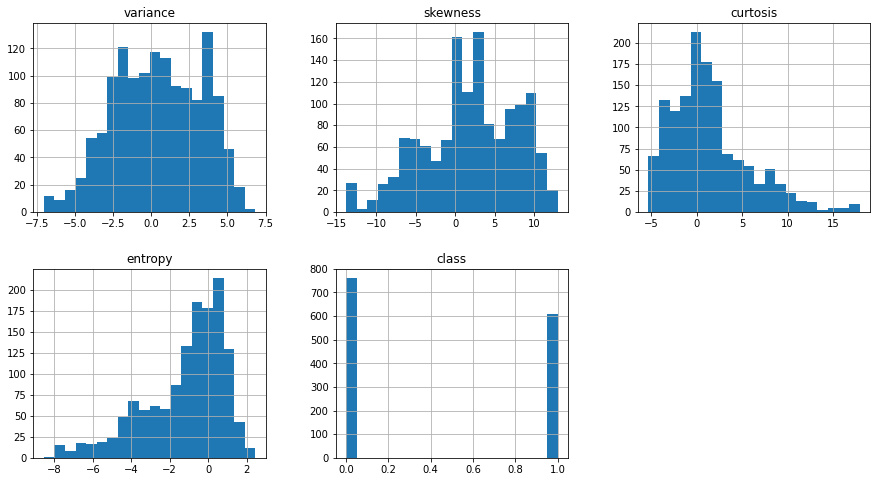

In [8]:
df.hist(bins=20,figsize=(15,8),layout=(2,3))

In [9]:
df.corr()

variance  skewness  curtosis   entropy     class
variance  1.000000  0.264026 -0.380850  0.276817 -0.724843
skewness  0.264026  1.000000 -0.786895 -0.526321 -0.444688
curtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
entropy   0.276817 -0.526321  0.318841  1.000000 -0.023424
class    -0.724843 -0.444688  0.155883 -0.023424  1.000000

In [10]:
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

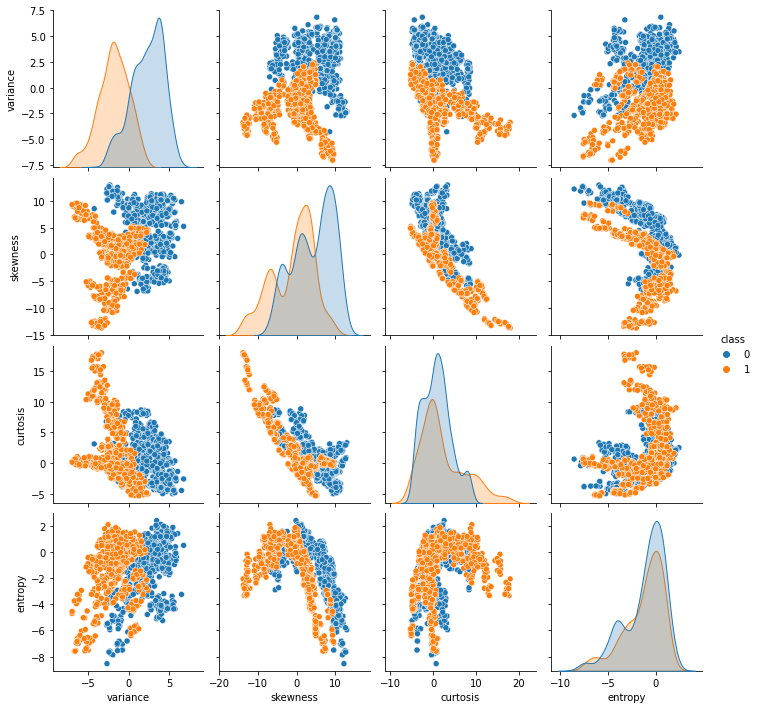

In [11]:
sns.pairplot(df,hue='class')

In [12]:
df.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [13]:
x=df.drop('class',axis=1)
y=df['class']

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=9)

<IPython.core.display.Javascript object>

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [16]:
xtrain

array([[ 1.21800495, -0.85389507,  0.43558323,  0.97473463],
       [ 1.37952829, -0.82462837,  0.34140517,  1.18648596],
       [ 0.06256722,  0.31202433, -1.27190391, -0.43426806],
       ...,
       [ 0.79743542,  0.87999705, -0.48126598,  0.77174793],
       [ 0.93302964,  0.21689913, -0.16477469,  0.77926255],
       [ 0.14683509,  0.14686448,  0.62432458,  0.83439396]])

In [17]:
xtest

array([[ 0.65590399,  1.37299521, -1.05312696, -0.80819835],
       [-0.18952097, -0.65554447,  1.72287225,  0.55132674],
       [ 0.25074427,  1.14206594, -0.50501273, -0.26592256],
       ...,
       [ 0.18856153,  0.65112155,  0.19827641,  0.41502037],
       [ 0.40581773,  0.29000019, -1.48406102, -1.15372042],
       [ 1.19948139,  1.34062294, -1.23462765, -1.05472484]])

*Logistic Regression*

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [21]:
LR=LogisticRegression(solver='liblinear',random_state=1)
LR.fit(xtrain,ytrain)
accuracies=cross_val_score(estimator=LR,X=xtrain,y=ytrain,cv=10)
print("accuracies:\n" ,accuracies)
print("mean accuracy:\n" ,accuracies.mean())

accuracies:
 [0.98958333 0.98958333 0.97916667 0.96875    0.96875    0.97916667
 0.98958333 0.98958333 1.         0.97916667]
mean accuracy:
 0.9833333333333332


In [22]:
predLR=LR.predict(xtest)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot: >

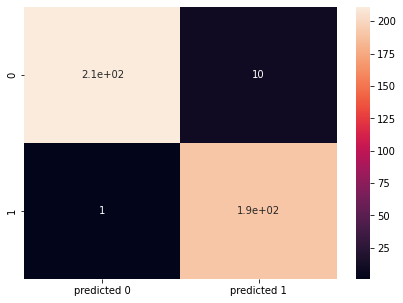

In [26]:
LR_cm=metrics.confusion_matrix(ytest, predLR, labels=[0,1])
df_cm=pd.DataFrame(LR_cm,index=[i for i in [0,1]], columns=[i for i in ['predicted 0','predicted 1']])
plt.figure(figsize=(7,5)) 
sns.heatmap(df_cm,annot=True)                 

*Support vector machine*


In [29]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(xtrain,ytrain)
svm_accuracies=cross_val_score(estimator=svm,X=xtrain,y=ytrain,cv=10)
print("accuracies:\n" ,svm_accuracies)
print("mean accuracy:\n" ,svm_accuracies.mean())

accuracies:
 [0.98958333 0.98958333 0.97916667 0.96875    0.98958333 0.98958333
 0.98958333 0.98958333 1.         0.97916667]
mean accuracy:
 0.9864583333333332


In [30]:
svm_pred=svm.predict(xtest)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot: >

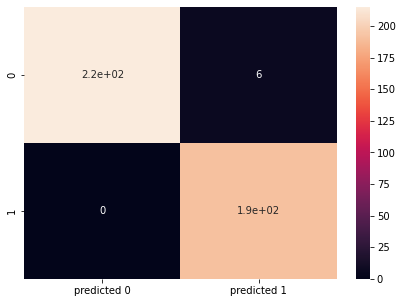

In [49]:
svm_cm=metrics.confusion_matrix(ytest, svm_pred, labels=[0,1])
df_cm1=pd.DataFrame(svm_cm,index=[i for i in [0,1]], columns=[i for i in ['predicted 0','predicted 1']])
plt.figure(figsize=(7,5)) 
sns.heatmap(df_cm1,annot=True)      

*KNeighborsClassifier*


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV
param_grid={'leaf_size':[2,5,7,9,11],'n_neighbors':[2,5,7,9,11],'p':[1,2]}
grid=GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [44]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 2}

In [45]:
KNN=KNeighborsClassifier(n_neighbors= 2,p= 2, leaf_size=2 )
KNN.fit(xtrain,ytrain)
KNN_accuracies=cross_val_score(estimator=KNN,X=xtrain,y=ytrain,cv=10)
print("accuracies:\n" ,KNN_accuracies)
print("mean accuracy:\n" ,KNN_accuracies.mean())

accuracies:
 [1.         1.         1.         1.         1.         0.98958333
 1.         0.98958333 1.         1.        ]
mean accuracy:
 0.9979166666666668


In [46]:
KNN_pred=KNN.predict(xtest)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot: >

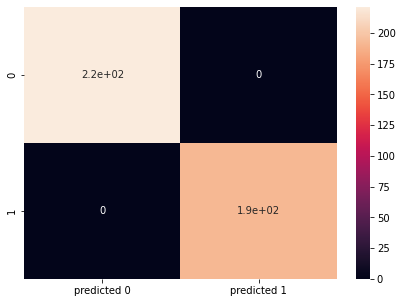

In [48]:
KNN_cm=metrics.confusion_matrix(ytest, KNN_pred, labels=[0,1])
df_cm2=pd.DataFrame(KNN_cm,index=[i for i in [0,1]], columns=[i for i in ['predicted 0','predicted 1']])
plt.figure(figsize=(7,5)) 
sns.heatmap(df_cm2,annot=True)  

In [51]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(8,4), max_iter=8000, alpha=0.0001,solver='sgd', verbose= 10, random_state=1, tol=0.0000001)
mlp.fit(xtrain,ytrain)

Iteration 1, loss = 0.80292820
Iteration 2, loss = 0.79960972
Iteration 3, loss = 0.79451018
Iteration 4, loss = 0.78884242
Iteration 5, loss = 0.78291784
Iteration 6, loss = 0.77667967
Iteration 7, loss = 0.77073216
Iteration 8, loss = 0.76478696
Iteration 9, loss = 0.75879838
Iteration 10, loss = 0.75331082
Iteration 11, loss = 0.74804790
Iteration 12, loss = 0.74286669
Iteration 13, loss = 0.73795779
Iteration 14, loss = 0.73312284
Iteration 15, loss = 0.72837504
Iteration 16, loss = 0.72372625
Iteration 17, loss = 0.71906376
Iteration 18, loss = 0.71453621
Iteration 19, loss = 0.71027656
Iteration 20, loss = 0.70585567
Iteration 21, loss = 0.70140988
Iteration 22, loss = 0.69728380
Iteration 23, loss = 0.69306047
Iteration 24, loss = 0.68888243
Iteration 25, loss = 0.68476621
Iteration 26, loss = 0.68066621
Iteration 27, loss = 0.67667906
Iteration 28, loss = 0.67257842
Iteration 29, loss = 0.66868753
Iteration 30, loss = 0.66467513
Iteration 31, loss = 0.66074954
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, random_state=1,
              solver='sgd', tol=1e-07, verbose=10)

In [52]:
mlp_pred=mlp.predict(xtest)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot: >

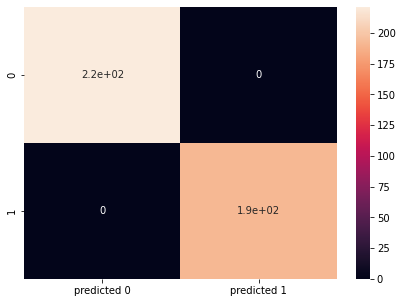

In [53]:
mlp_cm=metrics.confusion_matrix(ytest, mlp_pred, labels=[0,1])
df_cm3=pd.DataFrame(mlp_cm,index=[i for i in [0,1]], columns=[i for i in ['predicted 0','predicted 1']])
plt.figure(figsize=(7,5)) 
sns.heatmap(df_cm3,annot=True)  

In [54]:
mlp_accuracies=cross_val_score(estimator=mlp,X=xtrain,y=ytrain,cv=10)
print("accuracies:\n" ,mlp_accuracies)
print("mean accuracy:\n" ,mlp_accuracies.mean())

Iteration 1, loss = 0.80193225
Iteration 2, loss = 0.79860424
Iteration 3, loss = 0.79371823
Iteration 4, loss = 0.78812585
Iteration 5, loss = 0.78207945
Iteration 6, loss = 0.77607331
Iteration 7, loss = 0.77017028
Iteration 8, loss = 0.76444070
Iteration 9, loss = 0.75868163
Iteration 10, loss = 0.75329170
Iteration 11, loss = 0.74808247
Iteration 12, loss = 0.74300575
Iteration 13, loss = 0.73795745
Iteration 14, loss = 0.73332967
Iteration 15, loss = 0.72864220
Iteration 16, loss = 0.72411365
Iteration 17, loss = 0.71970161
Iteration 18, loss = 0.71531731
Iteration 19, loss = 0.71089477
Iteration 20, loss = 0.70661437
Iteration 21, loss = 0.70215365
Iteration 22, loss = 0.69798421
Iteration 23, loss = 0.69379854
Iteration 24, loss = 0.68965682
Iteration 25, loss = 0.68563859
Iteration 26, loss = 0.68152721
Iteration 27, loss = 0.67756235
Iteration 28, loss = 0.67389150
Iteration 29, loss = 0.66990254
Iteration 30, loss = 0.66602765
Iteration 31, loss = 0.66214467
Iteration 32, los

Printing accuracy of all models


In [55]:
print('Logestic Regression:\n',accuracies.mean())
print('SVM:\n',svm_accuracies.mean())
print('KNN:\n',KNN_accuracies.mean())
print('mlp:\n',mlp_accuracies.mean())

Logestic Regression:
 0.9833333333333332
SVM:
 0.9864583333333332
KNN:
 0.9979166666666668
mlp:
 0.9989583333333334
